# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [9]:
import os
import numpy as np
from PIL import Image

folder_path = 'images'
files = os.listdir(folder_path)
images = []

for file in files:
    img = Image.open(os.path.join(folder_path, file))
    img_array = (np.array(img) / 255).flatten()
    images.append(img_array)

images = np.array(images)
print(images.shape)

(8, 12288)


### 2. Compute the mean of the images. 

In [2]:

images_mean = np.mean(images, axis=0)
print(images_mean)

[0.27254902 0.34509804 0.22745098 ... 0.37696078 0.40735294 0.33676471]


### 3. Normalize the images by subtracting the mean from each image.

In [3]:
normalized_images = images - images_mean
print(normalized_images.shape)
print(normalized_images.mean())

(8, 12288)
9.25185853854297e-18


### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [8]:
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z),axis=1, keepdims=True)


W = np.load('coefs.npy')
b = np.load('bias.npy')
print(W.shape)
print(b.shape)

Z = np.dot(normalized_images,W) + b
print(Z.shape)

probs = softmax(Z)
print(np.sum(probs))
y_pred = np.argmax(probs, axis=1)

print(f"Predictions: {y_pred}")

(12288, 4)
(4,)
(8, 4)
8.0
Predictions: [0 0 1 1 2 2 3 2]


### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [80]:
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

y_true = np.array([0,0,1,1,2,2,3,3])
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.875


### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [81]:
labels = {0: 'cat', 1: 'dog', 2: 'frog', 3: 'horse'}

for i,prediction in enumerate(y_pred):
    print(f"Image {i+1} is a {labels[prediction]}")

Image 1 is a cat
Image 2 is a cat
Image 3 is a dog
Image 4 is a dog
Image 5 is a frog
Image 6 is a frog
Image 7 is a horse
Image 8 is a frog


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

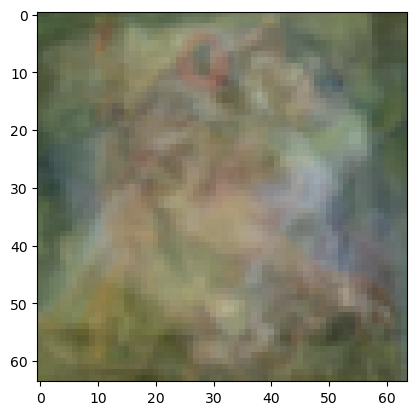

In [85]:
import matplotlib.pyplot as plt

mean_image = (images_mean * 255).astype(np.uint8).reshape(64,64,3)
plt.imshow(mean_image)